In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# COMPREHENSIVE DATA LOADING AND PREPARATION
# Load all three sheets
df1 = pd.read_csv("C:\\Users\\hp\\AppData\\Local\\Packages\\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\\LocalState\\sessions\\EE273A7461DF9EFEA9461B6FD6A81FBDE868F61B\\transfers\\2026-03\\1st sheet.csv")
df2 = pd.read_csv("C:\\Users\\hp\\AppData\\Local\\Packages\\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\\LocalState\\sessions\\EE273A7461DF9EFEA9461B6FD6A81FBDE868F61B\\transfers\\2026-03\\2nd sheet.csv")
df3 = pd.read_csv("C:\\Users\\hp\\AppData\\Local\\Packages\\5319275A.WhatsAppDesktop_cv1g1gvanyjgm\\LocalState\\sessions\\EE273A7461DF9EFEA9461B6FD6A81FBDE868F61B\\transfers\\2026-03\\3rd sheet.csv")

# Clean and prepare df1
df1 = df1[df1['Reg. Status'] == 'Complete']
df1 = df1[df1['Registration ID'] != 'UBA762O7']
df1 = df1.iloc[7:].reset_index(drop=True)
df1.index = df1.index + 1

# Fix semester values
def clean_semester(sem):
    if pd.isna(sem): return 0
    val_str = str(sem).lower().strip().replace('th', '').replace('semester', '').strip()
    try:
        val = int(val_str)
        return 6 if val == 6000 else val
    except: return 0

df1['Semester (4 Or 6)'] = df1['Semester (4 Or 6)'].apply(clean_semester)

# Prepare df2
def convert_to_seconds(t):
    if pd.isna(t) or t == '-': return 0
    try:
        p = str(t).strip().split('m ')
        return int(p[0])*60 + int(p[1].replace('s', ''))
    except: return 0

df2['Best Time (seconds)'] = df2['Best Time'].apply(convert_to_seconds)

# Prepare df3 - clean languages
def clean_lang(l):
    if pd.isna(l) or l == '-': return l
    l = str(l).lower().strip().split('(')[0].strip() if '(' in str(l) else str(l).lower().strip()
    mapping = {'python': 'Python', 'java': 'Java', 'c#': 'C#', 'csharp': 'C#', 'c++': 'C++', 
               'cpp': 'C++', 'javascript': 'JavaScript', 'js': 'JavaScript', 'c': 'C'}
    return mapping.get(l, l.strip().title())

df3['Question 1 : Language'] = df3['Question 1 : Language'].apply(clean_lang)
df3['Question 2 : Language'] = df3['Question 2 : Language'].apply(clean_lang)

# Merge all data
df_combined = df1.merge(df2[['Regn Id', 'Best Time (seconds)', 'Assessment Score', 'Percentage']], 
                         left_on='Registration ID', right_on='Regn Id', how='inner')
df_combined = df_combined.merge(df3[['Regn Id', 'Question 1 : Language', 'Question 2 : Language', 
                                       'Question 1 : Score', 'Question 2 : Score',
                                       'Question 1 : Total Test Cases', 'Question 1 : Passed Test Cases',
                                       'Question 2 : Total Test Cases', 'Question 2 : Passed Test Cases']], 
                                left_on='Registration ID', right_on='Regn Id', how='inner')

print("✓ Data loaded and prepared successfully!")
print(f"✓ Combined dataset shape: {df_combined.shape}")
print(f"✓ Semesters: {sorted(df_combined['Semester (4 Or 6)'].unique())}")

✓ Data loaded and prepared successfully!
✓ Combined dataset shape: (1011, 26)
✓ Semesters: [np.int64(0), np.int64(4), np.int64(6)]


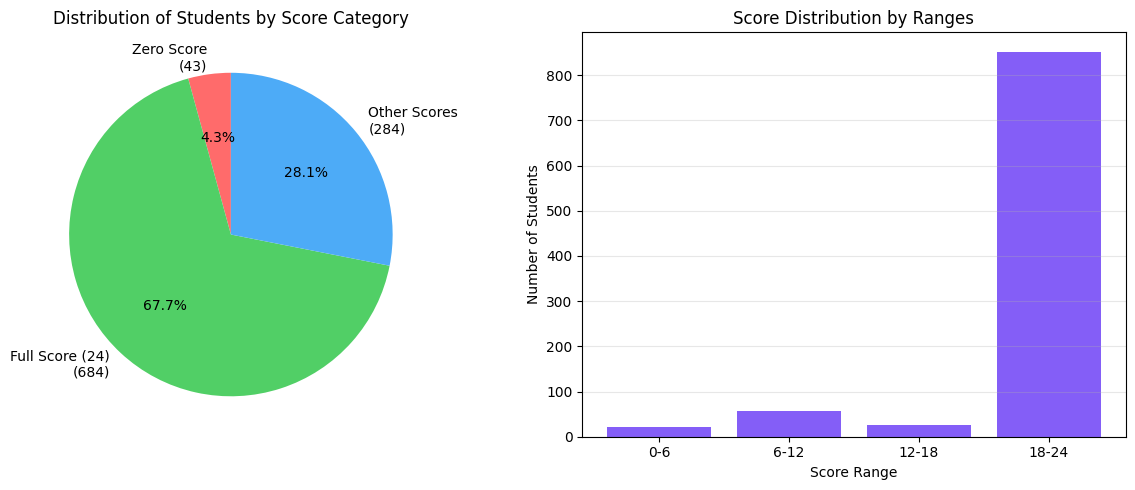

SCORE STATISTICS
Students with 0 Score: 43 (4.25%)
Students with Full Score (24): 684 (67.66%)
Total Students: 1011


In [8]:
# 1. Students with 0 Score vs Full Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
zero_score = (df_combined['Assessment Score'] == 0).sum()
full_score = (df_combined['Assessment Score'] == 24).sum()
other_score = len(df_combined) - zero_score - full_score

scores_data = [zero_score, full_score, other_score]
labels = [f'Zero Score\n({zero_score})', f'Full Score (24)\n({full_score})', f'Other Scores\n({other_score})']
colors = ['#ff6b6b', '#51cf66', '#4dabf7']

plt.pie(scores_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Students by Score Category')

plt.subplot(1, 2, 2)
score_counts = pd.cut(df_combined['Assessment Score'], bins=[0, 6, 12, 18, 24], 
                       labels=['0-6', '6-12', '12-18', '18-24']).value_counts().sort_index()
plt.bar(range(len(score_counts)), score_counts.values, color='#845ef7')
plt.xticks(range(len(score_counts)), score_counts.index)
plt.xlabel('Score Range')
plt.ylabel('Number of Students')
plt.title('Score Distribution by Ranges')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("=" * 60)
print("SCORE STATISTICS")
print("=" * 60)
print(f"Students with 0 Score: {zero_score} ({zero_score/len(df_combined)*100:.2f}%)")
print(f"Students with Full Score (24): {full_score} ({full_score/len(df_combined)*100:.2f}%)")
print(f"Total Students: {len(df_combined)}")

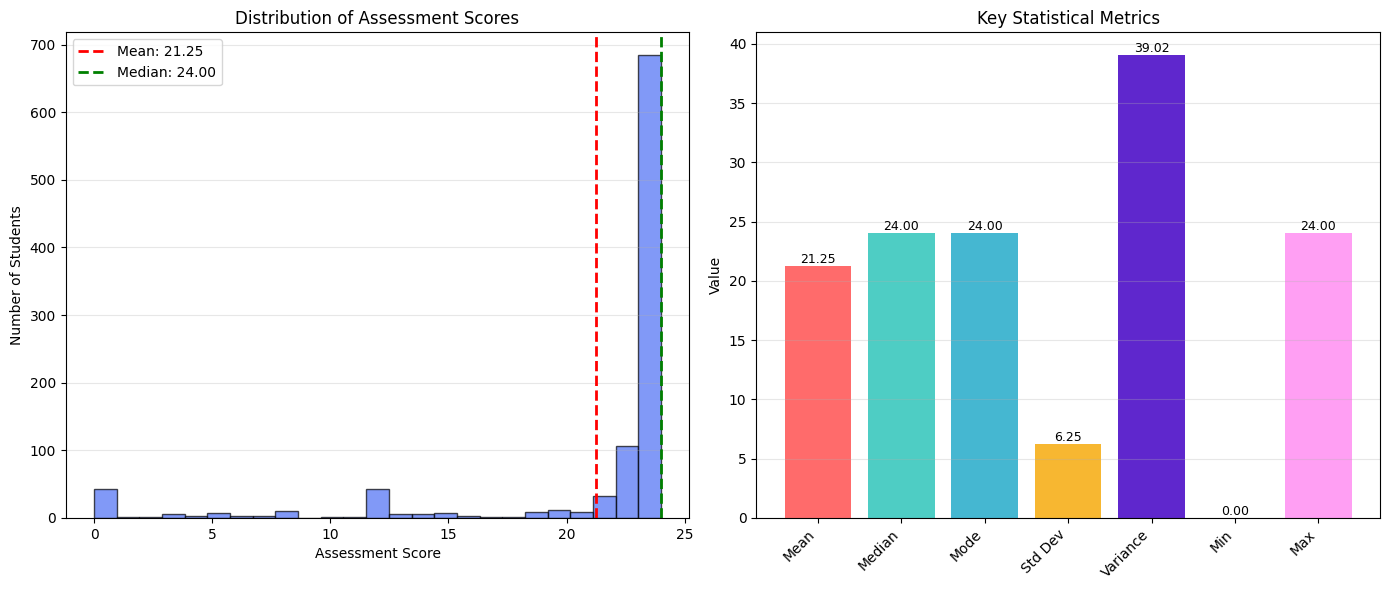


DETAILED STATISTICAL ANALYSIS
Mean................ 21.2507
Median.............. 24.0000
Mode................ 24.0000
Std Dev............. 6.2466
Variance............ 39.0201
Min................. 0.0000
Max................. 24.0000
Q1 (25%)............ 23.0000
Q3 (75%)............ 24.0000
IQR................. 1.0000


In [9]:
# 2. Statistical Analysis - Mean, Standard Deviation, etc.
plt.figure(figsize=(14, 6))

stats = {
    'Mean': df_combined['Assessment Score'].mean(),
    'Median': df_combined['Assessment Score'].median(),
    'Mode': df_combined['Assessment Score'].mode()[0],
    'Std Dev': df_combined['Assessment Score'].std(),
    'Variance': df_combined['Assessment Score'].var(),
    'Min': df_combined['Assessment Score'].min(),
    'Max': df_combined['Assessment Score'].max(),
    'Q1 (25%)': df_combined['Assessment Score'].quantile(0.25),
    'Q3 (75%)': df_combined['Assessment Score'].quantile(0.75),
    'IQR': df_combined['Assessment Score'].quantile(0.75) - df_combined['Assessment Score'].quantile(0.25)
}

plt.subplot(1, 2, 1)
plt.hist(df_combined['Assessment Score'], bins=25, color='#4c6ef5', edgecolor='black', alpha=0.7)
plt.axvline(stats['Mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {stats['Mean']:.2f}")
plt.axvline(stats['Median'], color='green', linestyle='--', linewidth=2, label=f"Median: {stats['Median']:.2f}")
plt.xlabel('Assessment Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Assessment Scores')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
stat_names = list(stats.keys())[:7]
stat_values = [stats[k] for k in stat_names]
bars = plt.bar(range(len(stat_names)), stat_values, color=['#ff6b6b', '#4ecdc4', '#45b7d1', '#f7b731', '#5f27cd', '#00d2d3', '#ff9ff3'])
plt.xticks(range(len(stat_names)), stat_names, rotation=45, ha='right')
plt.ylabel('Value')
plt.title('Key Statistical Metrics')
plt.grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, stat_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{val:.2f}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("DETAILED STATISTICAL ANALYSIS")
print("=" * 60)
for key, value in stats.items():
    print(f"{key:.<20} {value:.4f}")

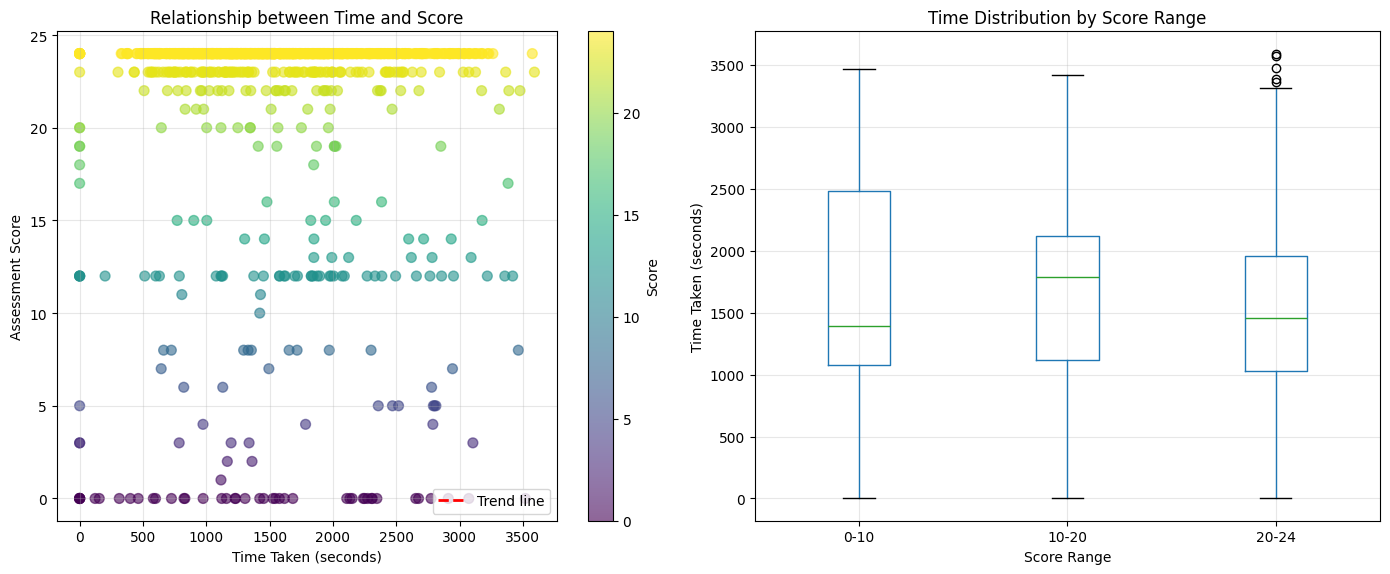


TIME vs SCORE ANALYSIS
Correlation between Time and Score: -0.0125
Average Time: 1541.50 seconds
Time Std Dev: 741.63 seconds


In [10]:
# 3. Graph between Time and Score
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(df_combined['Best Time (seconds)'], df_combined['Assessment Score'], 
                     alpha=0.6, c=df_combined['Assessment Score'], cmap='viridis', s=50)
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Assessment Score')
plt.title('Relationship between Time and Score')
plt.colorbar(scatter, label='Score')
# Add trend line
z = np.polyfit(df_combined['Best Time (seconds)'], df_combined['Assessment Score'], 1)
p = np.poly1d(z)
plt.plot(df_combined['Best Time (seconds)'].sort_values(), 
         p(df_combined['Best Time (seconds)'].sort_values()), 
         "r--", linewidth=2, label='Trend line')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Box plot for time vs score ranges
df_combined['Score Range'] = pd.cut(df_combined['Assessment Score'], 
                                     bins=[0, 10, 20, 24], 
                                     labels=['0-10', '10-20', '20-24'])
df_combined.boxplot(column='Best Time (seconds)', by='Score Range', ax=plt.gca())
plt.suptitle('')
plt.xlabel('Score Range')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Distribution by Score Range')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("TIME vs SCORE ANALYSIS")
print("=" * 60)
print(f"Correlation between Time and Score: {df_combined['Best Time (seconds)'].corr(df_combined['Assessment Score']):.4f}")
print(f"Average Time: {df_combined['Best Time (seconds)'].mean():.2f} seconds")
print(f"Time Std Dev: {df_combined['Best Time (seconds)'].std():.2f} seconds")

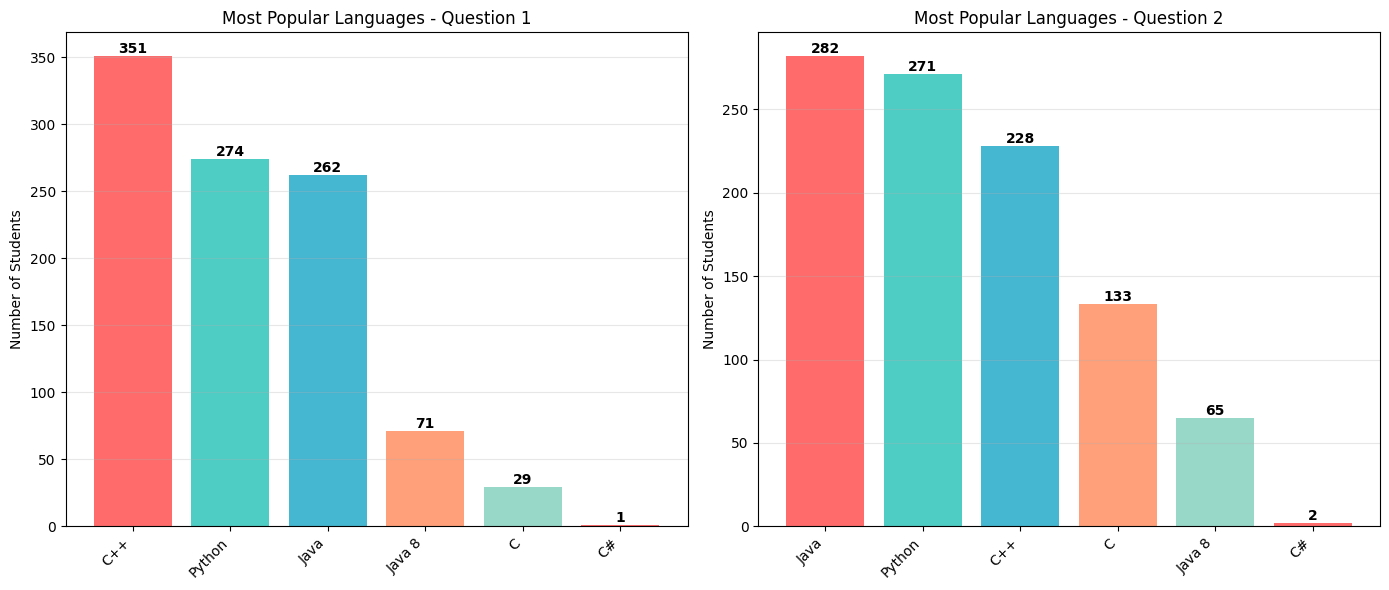


LANGUAGE POPULARITY ANALYSIS

Question 1 - Language Distribution:
  C++............  351 students (34.72%)
  Python.........  274 students (27.10%)
  Java...........  262 students (25.91%)
  Java 8.........   71 students ( 7.02%)
  C..............   29 students ( 2.87%)
  C#.............    1 students ( 0.10%)

Question 2 - Language Distribution:
  Java...........  282 students (27.89%)
  Python.........  271 students (26.81%)
  C++............  228 students (22.55%)
  C..............  133 students (13.16%)
  Java 8.........   65 students ( 6.43%)
  C#.............    2 students ( 0.20%)


In [11]:
# 4. Most Popular Languages
plt.figure(figsize=(14, 6))

# Language popularity for Question 1
q1_lang = df_combined['Question 1 : Language'].value_counts()
q2_lang = df_combined['Question 2 : Language'].value_counts()

plt.subplot(1, 2, 1)
colors_lang = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars1 = plt.bar(range(len(q1_lang)), q1_lang.values, color=colors_lang[:len(q1_lang)])
plt.xticks(range(len(q1_lang)), q1_lang.index, rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.title('Most Popular Languages - Question 1')
plt.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
bars2 = plt.bar(range(len(q2_lang)), q2_lang.values, color=colors_lang[:len(q2_lang)])
plt.xticks(range(len(q2_lang)), q2_lang.index, rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.title('Most Popular Languages - Question 2')
plt.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("LANGUAGE POPULARITY ANALYSIS")
print("=" * 60)
print("\nQuestion 1 - Language Distribution:")
for lang, count in q1_lang.items():
    print(f"  {lang:.<15} {count:>4} students ({count/len(df_combined)*100:>5.2f}%)")

print("\nQuestion 2 - Language Distribution:")
for lang, count in q2_lang.items():
    print(f"  {lang:.<15} {count:>4} students ({count/len(df_combined)*100:>5.2f}%)")

df3 columns: ['Regn Id', 'Question 1 : Title', 'Question 1 : Total Test Cases', 'Question 1 : Passed Test Cases', 'Question 1 : Score', 'Question 1 : Language', 'Question 2 : Title', 'Question 2 : Total Test Cases', 'Question 2 : Passed Test Cases', 'Question 2 : Score', 'Question 2 : Language']

df_combined columns: ['Registration ID', "Candidate's Name", "Candidate's Email", "Candidate's Mobile", 'Domain', 'Course', 'Specialization', 'Year of Graduation', 'Registration Time', 'Reg. Status', 'Roll Number', 'Semester (4 Or 6)', 'Round 1', 'Regn Id_x', 'Best Time (seconds)', 'Assessment Score', 'Percentage', 'Regn Id_y', 'Question 1 : Language', 'Question 2 : Language', 'Question 1 : Score', 'Question 2 : Score', 'Question 1 : Total Test Cases', 'Question 1 : Passed Test Cases', 'Question 2 : Total Test Cases', 'Question 2 : Passed Test Cases', 'Score Range']

Found columns: Q1 Total=['Question 1 : Total Test Cases'], Q1 Passed=['Question 1 : Passed Test Cases']


C:\Users\hp\AppData\Local\Temp\ipykernel_31640\3240532899.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=['Question 1', 'Question 2'], patch_artist=True)


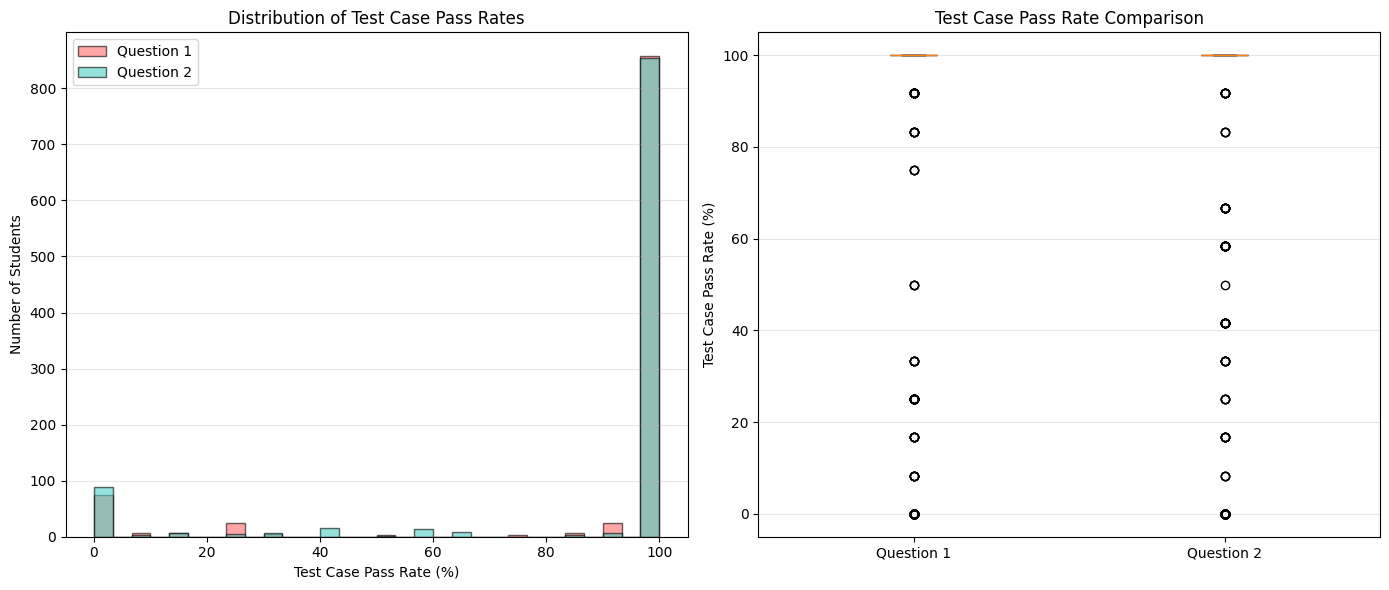


TEST CASE PASS RATE ANALYSIS

Question 1:
  Mean Pass Rate.......... 88.83%
  Median Pass Rate........ 100.00%
  Std Dev................ 29.71%

Question 2:
  Mean Pass Rate.......... 87.88%
  Median Pass Rate........ 100.00%
  Std Dev................ 30.51%


In [12]:
# 5. Test Cases Pass Rate Deviation
# First check what columns we have in df3
print("df3 columns:", df3.columns.tolist())
print("\ndf_combined columns:", df_combined.columns.tolist())

plt.figure(figsize=(14, 6))

# Find the correct column names
q1_total = [col for col in df3.columns if 'Total Test' in col and 'Question 1' in col]
q1_passed = [col for col in df3.columns if 'Passed Test' in col and 'Question 1' in col]
q2_total = [col for col in df3.columns if 'Total Test' in col and 'Question 2' in col]
q2_passed = [col for col in df3.columns if 'Passed Test' in col and 'Question 2' in col]

print(f"\nFound columns: Q1 Total={q1_total}, Q1 Passed={q1_passed}")

if q1_total and q1_passed:
    q1_pass_rate = (df_combined[q1_passed[0]] / df_combined[q1_total[0]] * 100)
    q2_pass_rate = (df_combined[q2_passed[0]] / df_combined[q2_total[0]] * 100)
    
    plt.subplot(1, 2, 1)
    plt.hist(q1_pass_rate, bins=30, alpha=0.6, label='Question 1', color='#FF6B6B', edgecolor='black')
    plt.hist(q2_pass_rate, bins=30, alpha=0.6, label='Question 2', color='#4ECDC4', edgecolor='black')
    plt.xlabel('Test Case Pass Rate (%)')
    plt.ylabel('Number of Students')
    plt.title('Distribution of Test Case Pass Rates')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    
    plt.subplot(1, 2, 2)
    data_to_plot = [q1_pass_rate, q2_pass_rate]
    bp = plt.boxplot(data_to_plot, labels=['Question 1', 'Question 2'], patch_artist=True)
    for patch, color in zip(bp['boxes'], ['#FF6B6B', '#4ECDC4']):
        patch.set_facecolor(color)
    plt.ylabel('Test Case Pass Rate (%)')
    plt.title('Test Case Pass Rate Comparison')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 60)
    print("TEST CASE PASS RATE ANALYSIS")
    print("=" * 60)
    print(f"\nQuestion 1:")
    print(f"  Mean Pass Rate.......... {q1_pass_rate.mean():.2f}%")
    print(f"  Median Pass Rate........ {q1_pass_rate.median():.2f}%")
    print(f"  Std Dev................ {q1_pass_rate.std():.2f}%")
    
    print(f"\nQuestion 2:")
    print(f"  Mean Pass Rate.......... {q2_pass_rate.mean():.2f}%")
    print(f"  Median Pass Rate........ {q2_pass_rate.median():.2f}%")
    print(f"  Std Dev................ {q2_pass_rate.std():.2f}%")

In [13]:
# 6. SEMESTER-WISE ANALYSIS AND SCORE DISTRIBUTION
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 6a. Students by Semester
sem_counts = df_combined['Semester (4 Or 6)'].value_counts().sort_index()
sem_labels = [f'Sem {int(s)}' if s > 0 else 'Unknown' for s in sem_counts.index]
axes[0,0].bar(range(len(sem_counts)), sem_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_xticks(range(len(sem_counts)))
axes[0,0].set_xticklabels(sem_labels)
axes[0,0].set_ylabel('Number of Students')
axes[0,0].set_title('Students by Semester')
axes[0,0].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(zip(range(len(sem_counts)), sem_counts.values)):
    axes[0,0].text(idx, val, str(int(val)), ha='center', va='bottom', fontweight='bold')

# 6b. Score Distribution by Semester
for sem in sorted(df_combined['Semester (4 Or 6)'].unique()):
    if sem > 0:
        sem_data = df_combined[df_combined['Semester (4 Or 6)'] == sem]['Assessment Score']
        axes[0,1].hist(sem_data, bins=12, alpha=0.6, label=f'Semester {int(sem)}')
axes[0,1].set_xlabel('Assessment Score')
axes[0,1].set_ylabel('Number of Students')
axes[0,1].set_title('Score Distribution by Semester')
axes[0,1].legend()
axes[0,1].grid(axis='y', alpha=0.3)

# 6c. Box plot of scores by semester
sem_groups = [df_combined[df_combined['Semester (4 Or 6)'] == s]['Assessment Score'].values 
              for s in sorted([s for s in df_combined['Semester (4 Or 6)'].unique() if s > 0])]
bp = axes[1,0].boxplot(sem_groups, labels=[f'Sem {int(s)}' for s in sorted([s for s in df_combined['Semester (4 Or 6)'].unique() if s > 0])], patch_artist=True)
for patch, color in zip(bp['boxes'], ['#FF6B6B', '#4ECDC4']):
    patch.set_facecolor(color)
axes[1,0].set_ylabel('Assessment Score')
axes[1,0].set_title('Score Distribution (Box Plot) by Semester')
axes[1,0].grid(axis='y', alpha=0.3)

# 6d. Score ranges distribution
score_ranges = pd.cut(df_combined['Assessment Score'], bins=[0, 6, 12, 18, 24], 
                       labels=['0-6', '6-12', '12-18', '18-24']).value_counts().sort_index()
axes[1,1].bar(range(len(score_ranges)), score_ranges.values, color='#845ef7')
axes[1,1].set_xticks(range(len(score_ranges)))
axes[1,1].set_xticklabels(score_ranges.index)
axes[1,1].set_xlabel('Score Range')
axes[1,1].set_ylabel('Number of Students')
axes[1,1].set_title('Distribution of Scores by Ranges')
axes[1,1].grid(axis='y', alpha=0.3)
for i, (idx, val) in enumerate(zip(range(len(score_ranges)), score_ranges.values)):
    axes[1,1].text(idx, val, str(int(val)), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Semester Statistics
print("\n" + "=" * 70)
print("SEMESTER-WISE DETAILED ANALYSIS")
print("=" * 70)
for sem in sorted([s for s in df_combined['Semester (4 Or 6)'].unique() if s > 0]):
    sem_data = df_combined[df_combined['Semester (4 Or 6)'] == sem]=
    scores = sem_data['Assessment Score']
    print(f"\nSemester {int(sem)}:")
    print(f"  Students........................ {len(sem_data)}")
    print(f"  Mean Score..................... {scores.mean():.2f}")
    print(f"  Median Score................... {scores.median():.2f}")
    print(f"  Std Deviation.................. {scores.std():.2f}")
    print(f"  Full Score (24)................ {(scores == 24).sum()} ({(scores == 24).sum()/len(sem_data)*100:.1f}%)")
    print(f"  Zero Score..................... {(scores == 0).sum()} ({(scores == 0).sum()/len(sem_data)*100:.1f}%)")

SyntaxError: invalid syntax (3508084591.py, line 58)

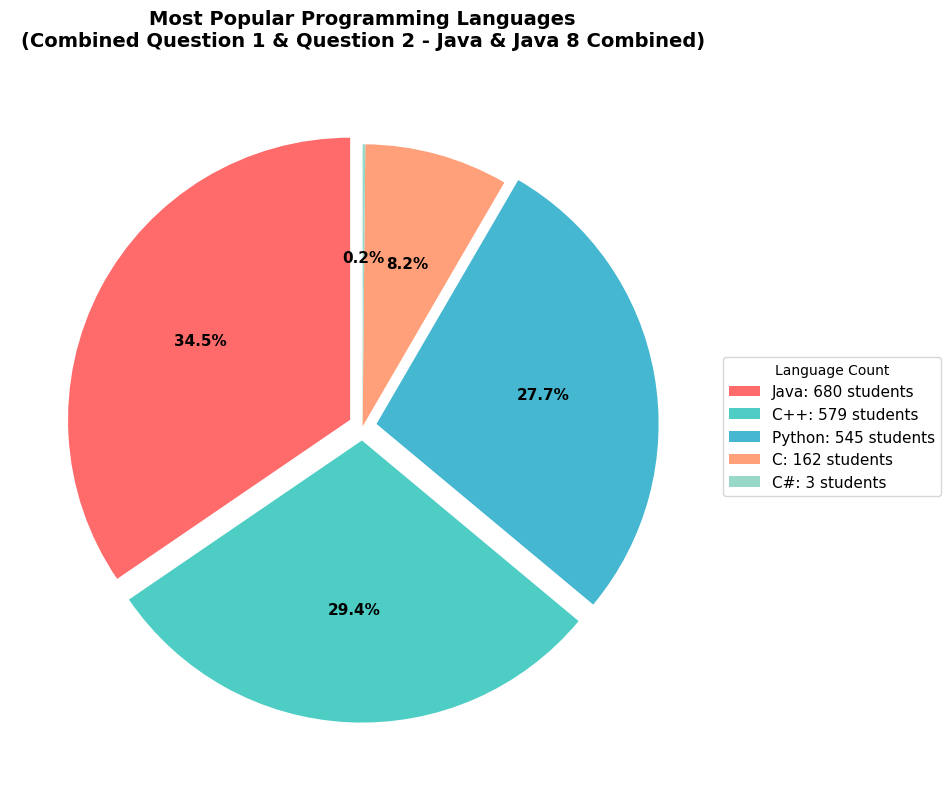


COMBINED LANGUAGE POPULARITY (Question 1 + Question 2)
Total responses: 2022

Language Distribution (Java & Java 8 Combined):
  Java...........  680 responses (33.63%)
  C++............  579 responses (28.64%)
  Python.........  545 responses (26.95%)
  C..............  162 responses ( 8.01%)
  C#.............    3 responses ( 0.15%)


In [18]:
# 7. COMBINED LANGUAGE POPULARITY PIE CHART (Q1 + Q2)
# Combine languages from both questions
all_languages = pd.concat([df_combined['Question 1 : Language'], df_combined['Question 2 : Language']])
lang_combined = all_languages.value_counts()

# Combine Java and Java 8
lang_combined_merged = lang_combined.copy()
java_total = lang_combined_merged.get('Java', 0) + lang_combined_merged.get('Java 8', 0)
lang_combined_merged = lang_combined_merged.drop(['Java', 'Java 8'], errors='ignore')
lang_combined_merged['Java'] = java_total
lang_combined_merged = lang_combined_merged.sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(14, 8))
colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
# Create explode tuple dynamically based on number of languages
explode = tuple([0.05 if i < 3 else 0 for i in range(len(lang_combined_merged))])

wedges, texts, autotexts = plt.pie(lang_combined_merged.values, labels=None, autopct='%1.1f%%',
                                     colors=colors_pie[:len(lang_combined_merged)], explode=explode, 
                                     startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})

# Enhance the appearance and move labels outside
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(11)
    autotext.set_weight('bold')

# Add legend with labels and counts outside
plt.legend(wedges, [f'{lang}: {count} students' for lang, count in lang_combined_merged.items()],
          title="Language Count",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=11,
          frameon=True)

plt.title('Most Popular Programming Languages\n(Combined Question 1 & Question 2 - Java & Java 8 Combined)', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("COMBINED LANGUAGE POPULARITY (Question 1 + Question 2)")
print("=" * 70)
print(f"Total responses: {len(all_languages)}")
print("\nLanguage Distribution (Java & Java 8 Combined):")
for lang, count in lang_combined_merged.items():
    percentage = count / len(all_languages) * 100
    print(f"  {lang:.<15} {count:>4} responses ({percentage:>5.2f}%)")

C:\Users\hp\AppData\Local\Temp\ipykernel_31640\3320148371.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


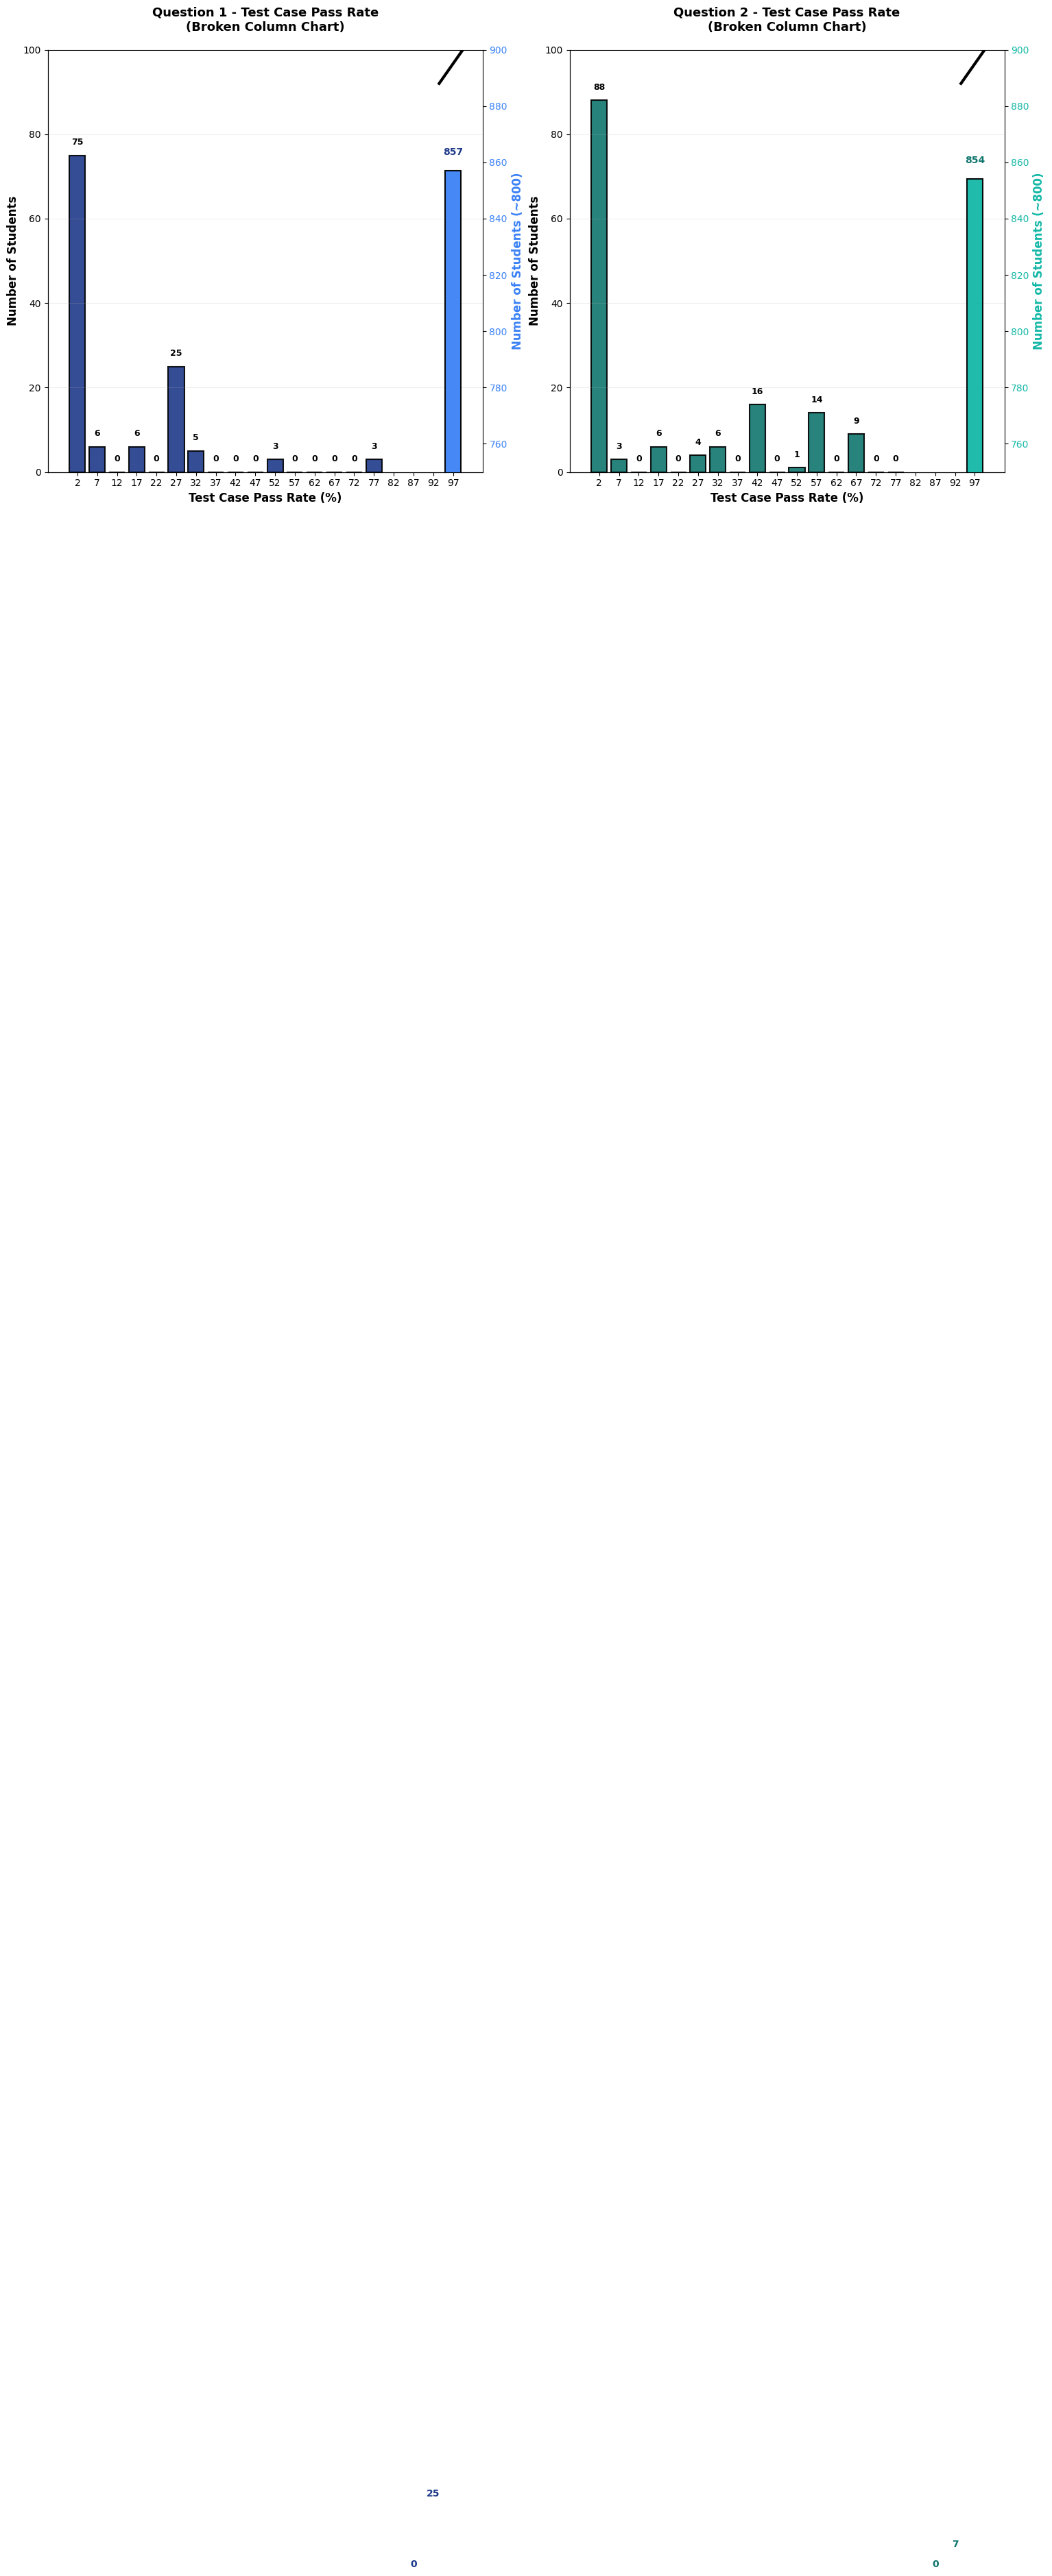


TEST CASE PASS RATE DISTRIBUTION (CUT AT 100%)

BROKEN COLUMN CHART - TEST CASE PASS RATE ANALYSIS

QUESTION 1 - Pass Rate Analysis:
  Mean Pass Rate.................. 88.83%
  Median Pass Rate................ 100.00%
  Std Deviation................... 29.71%
  Students with 100% pass rate.... 857 (84.8%)
  Students with 0% pass rate...... 75 (7.4%)

QUESTION 2 - Pass Rate Analysis:
  Mean Pass Rate.................. 87.88%
  Median Pass Rate................ 100.00%
  Std Deviation................... 30.51%
  Students with 100% pass rate.... 854 (84.5%)
  Students with 0% pass rate...... 88 (8.7%)


In [19]:
# 8. BROKEN COLUMN CHART - TEST CASE PASS RATE DISTRIBUTION (Focus on ~800 students at 100%)
# Calculate pass rates
q1_pass_rate = (df_combined['Question 1 : Passed Test Cases'] / df_combined['Question 1 : Total Test Cases'] * 100)
q2_pass_rate = (df_combined['Question 2 : Passed Test Cases'] / df_combined['Question 2 : Total Test Cases'] * 100)

# Create broken column chart focusing on 100% pass rate area
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Question 1
bins_q1 = np.arange(0, 105, 5)
hist_q1, edges_q1 = np.histogram(q1_pass_rate, bins=bins_q1)
bin_centers_q1 = (edges_q1[:-1] + edges_q1[1:]) / 2

# Separate data into two sections
lower_data_q1 = hist_q1[:-4]
lower_x_q1 = bin_centers_q1[:-4]
upper_data_q1 = hist_q1[-3:]
upper_x_q1 = bin_centers_q1[-3:]

# Plot lower section (0-100)
ax1.bar(lower_x_q1, lower_data_q1, width=4, color='#1E3A8A', edgecolor='black', linewidth=1.5, alpha=0.9)
ax1.set_ylim(0, 100)
ax1.set_xlim(-5, 105)
ax1.set_ylabel('Number of Students', fontsize=12, fontweight='bold')
ax1.set_xlabel('Test Case Pass Rate (%)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)

# Add break indicator (zigzag pattern)
break_x = 97
break_height = 100
zigzag_width = 3
zigzag_height = 8
ax1.plot([break_x - zigzag_width, break_x + zigzag_width, break_x - zigzag_width, break_x + zigzag_width], 
         [break_height - zigzag_height, break_height, break_height + zigzag_height, break_height + 2*zigzag_height],
         'k-', linewidth=3)
ax1.set_xticks(bin_centers_q1)
ax1.set_xticklabels([f'{int(x)}' for x in bin_centers_q1], fontsize=10)

# Add value labels on lower bars
for x, h in zip(lower_x_q1, lower_data_q1):
    ax1.text(x, h + 2, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Create secondary axis for upper section (zoomed in around 800)
ax1_upper = ax1.twinx()
ax1_upper.bar(upper_x_q1, upper_data_q1, width=4, color='#3B82F6', edgecolor='black', linewidth=1.5, alpha=0.95)
ax1_upper.set_ylim(750, 900)
ax1_upper.set_ylabel('Number of Students (~800)', fontsize=12, fontweight='bold', color='#3B82F6')
ax1_upper.tick_params(axis='y', labelcolor='#3B82F6')

# Add value labels on upper bars
for x, h in zip(upper_x_q1, upper_data_q1):
    ax1_upper.text(x, h + 5, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=10, color='#1E3A8A')

ax1.set_title('Question 1 - Test Case Pass Rate\n(Broken Column Chart)', fontsize=13, fontweight='bold', pad=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Question 2
bins_q2 = np.arange(0, 105, 5)
hist_q2, edges_q2 = np.histogram(q2_pass_rate, bins=bins_q2)
bin_centers_q2 = (edges_q2[:-1] + edges_q2[1:]) / 2

# Separate data into two sections
lower_data_q2 = hist_q2[:-4]
lower_x_q2 = bin_centers_q2[:-4]
upper_data_q2 = hist_q2[-3:]
upper_x_q2 = bin_centers_q2[-3:]

# Plot lower section (0-100)
ax2.bar(lower_x_q2, lower_data_q2, width=4, color='#0F766E', edgecolor='black', linewidth=1.5, alpha=0.9)
ax2.set_ylim(0, 100)
ax2.set_xlim(-5, 105)
ax2.set_ylabel('Number of Students', fontsize=12, fontweight='bold')
ax2.set_xlabel('Test Case Pass Rate (%)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)

# Add break indicator (zigzag pattern)
ax2.plot([break_x - zigzag_width, break_x + zigzag_width, break_x - zigzag_width, break_x + zigzag_width], 
         [break_height - zigzag_height, break_height, break_height + zigzag_height, break_height + 2*zigzag_height],
         'k-', linewidth=3)
ax2.set_xticks(bin_centers_q2)
ax2.set_xticklabels([f'{int(x)}' for x in bin_centers_q2], fontsize=10)

# Add value labels on lower bars
for x, h in zip(lower_x_q2, lower_data_q2):
    ax2.text(x, h + 2, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=9)

# Create secondary axis for upper section (zoomed in around 800)
ax2_upper = ax2.twinx()
ax2_upper.bar(upper_x_q2, upper_data_q2, width=4, color='#14B8A6', edgecolor='black', linewidth=1.5, alpha=0.95)
ax2_upper.set_ylim(750, 900)
ax2_upper.set_ylabel('Number of Students (~800)', fontsize=12, fontweight='bold', color='#14B8A6')
ax2_upper.tick_params(axis='y', labelcolor='#14B8A6')

# Add value labels on upper bars
for x, h in zip(upper_x_q2, upper_data_q2):
    ax2_upper.text(x, h + 5, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=10, color='#0F766E')

ax2.set_title('Question 2 - Test Case Pass Rate\n(Broken Column Chart)', fontsize=13, fontweight='bold', pad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Detailed statistics
print("\n" + "=" * 70)
print("TEST CASE PASS RATE DISTRIBUTION (CUT AT 100%)")
print("=" * 70)

# Detailed statistics
print("\n" + "=" * 70)
print("BROKEN COLUMN CHART - TEST CASE PASS RATE ANALYSIS")
print("=" * 70)

print("\nQUESTION 1 - Pass Rate Analysis:")
print(f"  Mean Pass Rate.................. {q1_pass_rate.mean():.2f}%")
print(f"  Median Pass Rate................ {q1_pass_rate.median():.2f}%")
print(f"  Std Deviation................... {q1_pass_rate.std():.2f}%")
print(f"  Students with 100% pass rate.... {(q1_pass_rate == 100).sum()} ({(q1_pass_rate == 100).sum()/len(df_combined)*100:.1f}%)")
print(f"  Students with 0% pass rate...... {(q1_pass_rate == 0).sum()} ({(q1_pass_rate == 0).sum()/len(df_combined)*100:.1f}%)")

print("\nQUESTION 2 - Pass Rate Analysis:")
print(f"  Mean Pass Rate.................. {q2_pass_rate.mean():.2f}%")
print(f"  Median Pass Rate................ {q2_pass_rate.median():.2f}%")
print(f"  Std Deviation................... {q2_pass_rate.std():.2f}%")
print(f"  Students with 100% pass rate.... {(q2_pass_rate == 100).sum()} ({(q2_pass_rate == 100).sum()/len(df_combined)*100:.1f}%)")
print(f"  Students with 0% pass rate...... {(q2_pass_rate == 0).sum()} ({(q2_pass_rate == 0).sum()/len(df_combined)*100:.1f}%)")

C:\Users\hp\AppData\Local\Temp\ipykernel_31640\2375284361.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


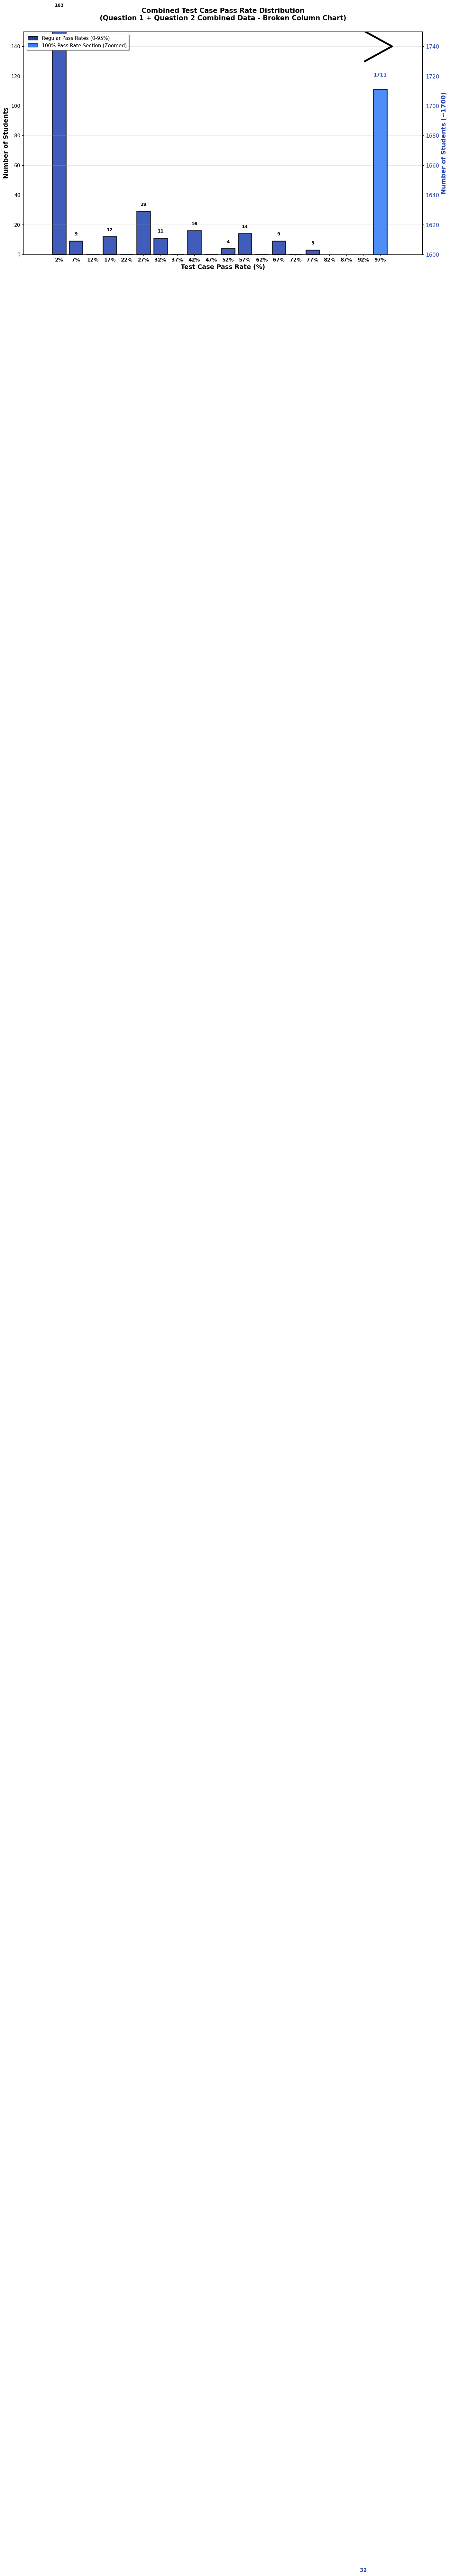


COMBINED TEST CASE PASS RATE ANALYSIS (QUESTION 1 + QUESTION 2)

Combined Data (Both Questions):
  Total Responses.................. 2022
  Mean Pass Rate.................. 88.36%
  Median Pass Rate................ 100.00%
  Std Deviation................... 30.11%
  Min Pass Rate................... 0.00%
  Max Pass Rate................... 100.00%

Concentration Analysis:
  Students with 100% pass rate.... 1711 (84.6%)
  Students with 0% pass rate...... 163 (8.1%)
  Students with 90-100% rate..... 1743 (86.2%)
  Students with 50-90% rate...... 39 (1.9%)
  Students with 0-50% rate....... 240 (11.9%)


In [20]:
# 9. COMBINED BROKEN COLUMN CHART - BOTH QUESTIONS (Q1 + Q2 Together)
# Combine both questions data
combined_pass_rate = pd.concat([q1_pass_rate, q2_pass_rate], ignore_index=True)
question_labels = ['Q1'] * len(q1_pass_rate) + ['Q2'] * len(q2_pass_rate)

# Create bins for combined data
bins_combined = np.arange(0, 105, 5)
hist_combined, edges_combined = np.histogram(combined_pass_rate, bins=bins_combined)
bin_centers_combined = (edges_combined[:-1] + edges_combined[1:]) / 2

# Separate data into two sections
lower_data_combined = hist_combined[:-4]
lower_x_combined = bin_centers_combined[:-4]
upper_data_combined = hist_combined[-3:]
upper_x_combined = bin_centers_combined[-3:]

# Create single large chart showing combined data
fig, ax_main = plt.subplots(figsize=(16, 9))

# Plot lower section (0-100)
bars_lower = ax_main.bar(lower_x_combined, lower_data_combined, width=4, 
                         color='#1E40AF', edgecolor='#000000', linewidth=2, alpha=0.85, label='Lower Section')
ax_main.set_ylim(0, 150)
ax_main.set_xlim(-8, 110)
ax_main.set_ylabel('Number of Students', fontsize=14, fontweight='bold')
ax_main.set_xlabel('Test Case Pass Rate (%)', fontsize=14, fontweight='bold')
ax_main.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.7)

# Add break indicator (wavy pattern - more prominent)
break_x = 97
break_y_start = 140
ax_main.plot([break_x - 4, break_x + 4, break_x - 4, break_x + 4, break_x - 4, break_x + 4], 
             [break_y_start - 10, break_y_start, break_y_start + 10, break_y_start + 20, break_y_start + 30, break_y_start + 40],
             'k-', linewidth=4)

# Add value labels on lower bars
for x, h in zip(lower_x_combined, lower_data_combined):
    if h > 0:
        ax_main.text(x, h + 3, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=10)

# Create secondary axis for upper section (zoomed in around 1700)
ax_main_upper = ax_main.twinx()
bars_upper = ax_main_upper.bar(upper_x_combined, upper_data_combined, width=4, 
                               color='#3B82F6', edgecolor='#000000', linewidth=2, alpha=0.9, label='Upper Section (Zoomed)')
ax_main_upper.set_ylim(1600, 1750)
ax_main_upper.set_ylabel('Number of Students (~1700)', fontsize=14, fontweight='bold', color='#1E40AF')
ax_main_upper.tick_params(axis='y', labelcolor='#1E40AF', labelsize=12)

# Add value labels on upper bars
for x, h in zip(upper_x_combined, upper_data_combined):
    if h > 0:
        ax_main_upper.text(x, h + 8, str(int(h)), ha='center', va='bottom', fontweight='bold', fontsize=11, color='#1E40AF')

# Set x-axis ticks and labels
ax_main.set_xticks(bin_centers_combined)
ax_main.set_xticklabels([f'{int(x)}%' for x in bin_centers_combined], fontsize=11, fontweight='bold')

# Styling
ax_main.set_title('Combined Test Case Pass Rate Distribution\n(Question 1 + Question 2 Combined Data - Broken Column Chart)', 
                  fontsize=15, fontweight='bold', pad=25)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)
ax_main.tick_params(axis='both', labelsize=11)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#1E40AF', edgecolor='black', label='Regular Pass Rates (0-95%)'),
                   Patch(facecolor='#3B82F6', edgecolor='black', label='100% Pass Rate Section (Zoomed)')]
ax_main.legend(handles=legend_elements, loc='upper left', fontsize=11, frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()

# Statistics for combined data
print("\n" + "=" * 80)
print("COMBINED TEST CASE PASS RATE ANALYSIS (QUESTION 1 + QUESTION 2)")
print("=" * 80)

print(f"\nCombined Data (Both Questions):")
print(f"  Total Responses.................. {len(combined_pass_rate)}")
print(f"  Mean Pass Rate.................. {combined_pass_rate.mean():.2f}%")
print(f"  Median Pass Rate................ {combined_pass_rate.median():.2f}%")
print(f"  Std Deviation................... {combined_pass_rate.std():.2f}%")
print(f"  Min Pass Rate................... {combined_pass_rate.min():.2f}%")
print(f"  Max Pass Rate................... {combined_pass_rate.max():.2f}%")

print(f"\nConcentration Analysis:")
print(f"  Students with 100% pass rate.... {(combined_pass_rate == 100).sum()} ({(combined_pass_rate == 100).sum()/len(combined_pass_rate)*100:.1f}%)")
print(f"  Students with 0% pass rate...... {(combined_pass_rate == 0).sum()} ({(combined_pass_rate == 0).sum()/len(combined_pass_rate)*100:.1f}%)")
print(f"  Students with 90-100% rate..... {((combined_pass_rate >= 90) & (combined_pass_rate <= 100)).sum()} ({((combined_pass_rate >= 90) & (combined_pass_rate <= 100)).sum()/len(combined_pass_rate)*100:.1f}%)")
print(f"  Students with 50-90% rate...... {((combined_pass_rate >= 50) & (combined_pass_rate < 90)).sum()} ({((combined_pass_rate >= 50) & (combined_pass_rate < 90)).sum()/len(combined_pass_rate)*100:.1f}%)")
print(f"  Students with 0-50% rate....... {(combined_pass_rate < 50).sum()} ({(combined_pass_rate < 50).sum()/len(combined_pass_rate)*100:.1f}%)")